## Sprint 3 - Grupo MAI

Conjunto de dados abrangente sobre vendas no varejo on-line e dados de clientes

- InvoiceNo: Este atributo refere-se a números de fatura que são números inteiros de seis dígitos atribuídos exclusivamente a cada transação registrada neste sistema. As transações marcadas com 'c' no início significam cancelamentos – acrescentando ainda outra dimensão para a análise do padrão de compra. Um número de 6 dígitos atribuído exclusivamente a cada transação. Se o número tiver o prefixo 'c', indica um cancelamento. (Nominal)

- StockCode: o código de estoque corresponde a itens específicos, pois são representados no sistema de estoque por meio de números inteiros de 5 dígitos; estes permitem fácil identificação e distinção entre produtos. Um identificador exclusivo para cada produto vendido pelo varejista. (Nominal)

- Description: refere-se aos nomes dos produtos, dando aos usuários conhecimento qualitativo sobre que tipo de itens estão sendo comprados e vendidos com frequência. O nome ou uma breve descrição do produto. (Nominal)

- Quantity: Esses números determinam o volume de cada produto por transação – números importantes que podem ajudar a entender melhor as tendências de compra. O número de unidades do produto vendidas em cada transação. (Numérico)

- InvoiceDate: as datas da fatura detalham quando cada transação foi gerada até carimbos de data/hora precisos – inestimável ao conduzir análises de tendências baseadas no tempo ou estudos de segmentação. A data e hora em que a transação foi feita. (Data hora)

- UnitPrice: Os preços unitários representam quanto cada unidade é vendida – crucial para cálculos de receita ou análises relacionadas a custos. O preço por unidade do produto em libras esterlinas. (Numérico)

- CostumerID: Identificação do Cliente. (Numérico)

- Country: este atributo de localização mostra a origem de cada cliente, adicionando segmentação geográfica ao seu kit de ferramentas de investigação de dados. O país onde o cliente reside. (Nominal)

### Pré-processamento de dados

In [191]:
import pandas as pd

In [192]:
dados = 'online_retail.csv'

In [193]:
df = pd.read_csv(dados)

In [194]:
print(df)

         index InvoiceNo StockCode                          Description  \
0            0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER   
1            1    536365     71053                  WHITE METAL LANTERN   
2            2    536365    84406B       CREAM CUPID HEARTS COAT HANGER   
3            3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
4            4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.   
...        ...       ...       ...                                  ...   
541904  541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS   
541905  541905    581587     22899         CHILDREN'S APRON DOLLY GIRL    
541906  541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL    
541907  541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE   
541908  541908    581587     22138        BAKING SET 9 PIECE RETROSPOT    

        Quantity      InvoiceDate  UnitPrice  CustomerID         Country  
0              6   12/1/

In [195]:
df.head(5)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [196]:
df.shape

(541909, 9)

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [198]:
df.isnull().sum()

,0
index,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


Removendo as linhas incompletas do dataframe. Na coluna 'Descrição' e 'CostumerID' haviam linhas sem dados

In [199]:
df = df.dropna()

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        406829 non-null  int64  
 1   InvoiceNo    406829 non-null  object 
 2   StockCode    406829 non-null  object 
 3   Description  406829 non-null  object 
 4   Quantity     406829 non-null  int64  
 5   InvoiceDate  406829 non-null  object 
 6   UnitPrice    406829 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      406829 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 31.0+ MB


In [201]:
df.isnull().sum()

,0
index,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


Verificando se não possuem dados duplcados

In [202]:
df = df.drop_duplicates()

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        406829 non-null  int64  
 1   InvoiceNo    406829 non-null  object 
 2   StockCode    406829 non-null  object 
 3   Description  406829 non-null  object 
 4   Quantity     406829 non-null  int64  
 5   InvoiceDate  406829 non-null  object 
 6   UnitPrice    406829 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      406829 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 31.0+ MB


In [204]:
df.describe()

,index,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,278048.159318,12.061303,3.460471,15287.690570
std,152744.019884,248.693370,69.315162,1713.600303
min,0.000000,-80995.000000,0.000000,12346.000000
25%,147749.000000,2.000000,1.250000,13953.000000
50%,284435.000000,5.000000,1.950000,15152.000000
75%,409528.000000,12.000000,3.750000,16791.000000
max,541908.000000,80995.000000,38970.000000,18287.000000


Tranformando a data da coluna 'InvoiceDate' para Coluna de Mês, de Ano e de Mês e Ano.

In [205]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [206]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Year-Month'] = df['InvoiceDate'].dt.strftime('%Y-%m')

In [207]:
df = df.drop(columns='InvoiceDate')

In [208]:
df.head(5)

,index,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Year-Month
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010,12,2010-12
1,1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010,12,2010-12
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010,12,2010-12
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010,12,2010-12
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010,12,2010-12


Criando variável para saber o valor total gasto por cada cliente


In [209]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [210]:
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Year-Month,TotalPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010,12,2010-12,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010,12,2010-12,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010,12,2010-12,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010,12,2010-12,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010,12,2010-12,20.34


In [211]:
total_spent_per_customer = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()

In [212]:
total_spent_per_customer.rename(columns={'TotalPrice': 'TotalSpent'}, inplace=True)

In [213]:
df = pd.merge(df, total_spent_per_customer, on='CustomerID', how='left')

In [214]:
df.head(10)

,index,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Year-Month,TotalPrice,TotalSpent
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010,12,2010-12,15.30,5288.63
1,1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010,12,2010-12,20.34,5288.63
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010,12,2010-12,22.00,5288.63
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010,12,2010-12,20.34,5288.63
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010,12,2010-12,20.34,5288.63
5,5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,7.65,17850.0,United Kingdom,2010,12,2010-12,15.30,5288.63
6,6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,4.25,17850.0,United Kingdom,2010,12,2010-12,25.50,5288.63
7,7,536366,22633,HAND WARMER UNION JACK,6,1.85,17850.0,United Kingdom,2010,12,2010-12,11.10,5288.63
8,8,536366,22632,HAND WARMER RED POLKA DOT,6,1.85,17850.0,United Kingdom,2010,12,2010-12,11.10,5288.63
9,9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,1.69,13047.0,United Kingdom,2010,12,2010-12,54.08,3079.10


Criando variável para saber a média de preço dos produtos comprados por cada cliente

In [215]:
average_price_per_customer = df.groupby('CustomerID')['UnitPrice'].mean().reset_index()

In [216]:
average_price_per_customer.rename(columns={'UnitPrice': 'AveragePrice'}, inplace=True)

In [217]:
df = pd.merge(df, average_price_per_customer, on='CustomerID', how='left')

Criando variável para saber a frequência de compra de cada cliente

In [218]:
frequency_per_customer = df.groupby('CustomerID')['InvoiceNo'].count().reset_index()

In [219]:
frequency_per_customer.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)

In [220]:
df = pd.merge(df, frequency_per_customer, on='CustomerID', how='left')

In [221]:
df.head(10)

,index,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Year-Month,TotalPrice,TotalSpent,AveragePrice,Frequency
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010,12,2010-12,15.30,5288.63,3.924712,312
1,1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010,12,2010-12,20.34,5288.63,3.924712,312
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010,12,2010-12,22.00,5288.63,3.924712,312
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010,12,2010-12,20.34,5288.63,3.924712,312
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010,12,2010-12,20.34,5288.63,3.924712,312
5,5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,7.65,17850.0,United Kingdom,2010,12,2010-12,15.30,5288.63,3.924712,312
6,6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,4.25,17850.0,United Kingdom,2010,12,2010-12,25.50,5288.63,3.924712,312
7,7,536366,22633,HAND WARMER UNION JACK,6,1.85,17850.0,United Kingdom,2010,12,2010-12,11.10,5288.63,3.924712,312
8,8,536366,22632,HAND WARMER RED POLKA DOT,6,1.85,17850.0,United Kingdom,2010,12,2010-12,11.10,5288.63,3.924712,312
9,9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,1.69,13047.0,United Kingdom,2010,12,2010-12,54.08,3079.10,4.072959,196


### Análise Exploratória

É realizada uma análise através de médias, agrupamento de colunas, gráficos e desahborads, etc, para termos no fim um resumo do que foi pesquisado, analisado e em qual conclusão chegamos.

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns

Este gráfico ajuda a visualizar a distribuição das compras ao longo dos anos, permitindo identificar quais anos tiveram mais ou menos atividade de compras.

Text(0.5, 1.0, 'Distribuição das Compras por Ano')

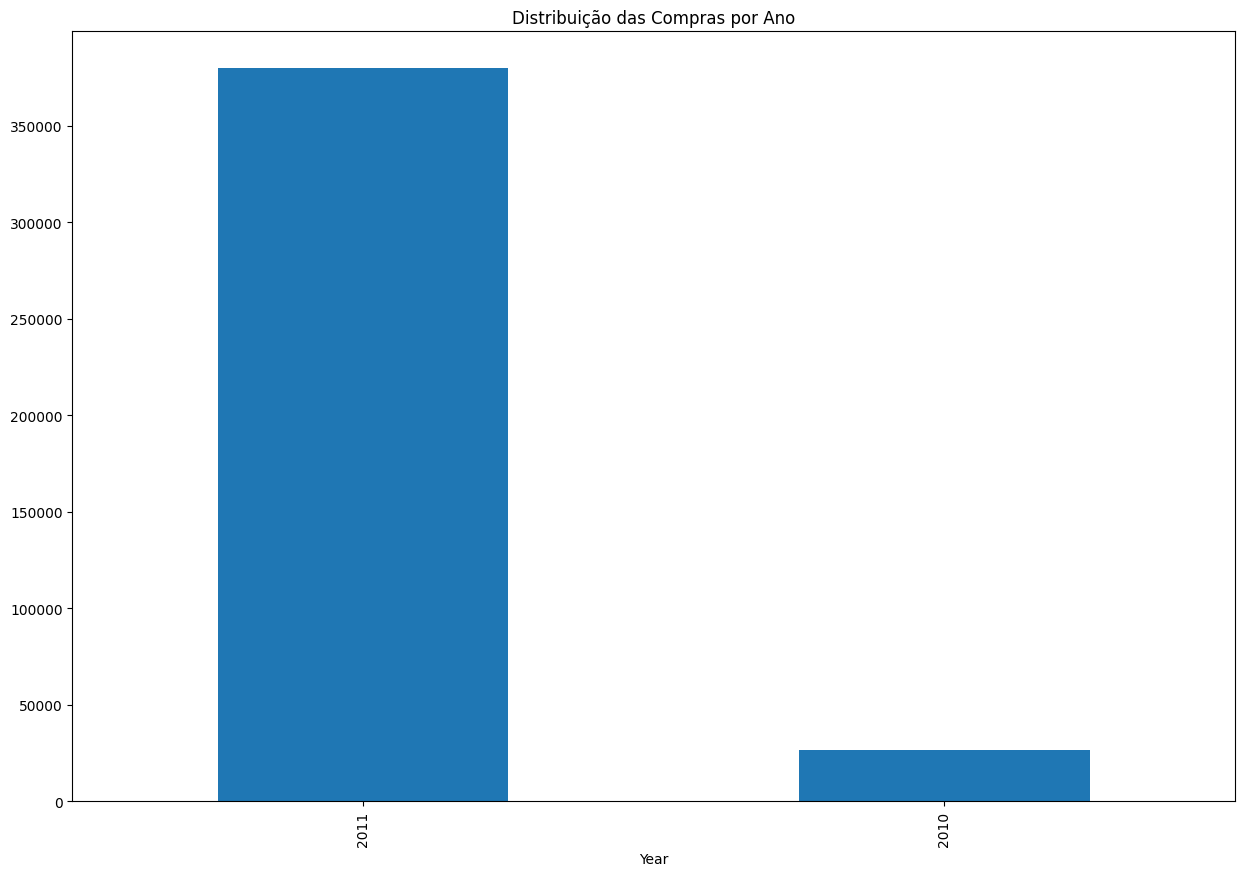

In [223]:
df.Year.value_counts().plot.bar()
plt.title('Distribuição das Compras por Ano')

Produto mais Vendido no ano de 2010

In [224]:
round(df.loc[df.Year == 2010].groupby('Description')['TotalPrice'].sum().sort_values(ascending = False).head(10),0)

,TotalPrice
Description,
REGENCY CAKESTAND 3 TIER,16784.0
WHITE HANGING HEART T-LIGHT HOLDER,8246.0
VINTAGE UNION JACK MEMOBOARD,6938.0
WOOD BLACK BOARD ANT WHITE FINISH,6672.0
BLACK RECORD COVER FRAME,6249.0
CHILLI LIGHTS,6199.0
CREAM HEART CARD HOLDER,5537.0
BLACK HEART CARD HOLDER,5158.0
ROUND SNACK BOXES SET OF 4 FRUITS,4770.0


Produto mais Vendido no ano de 2011

In [225]:
round(df.loc[df.Year == 2011].groupby('Description')['TotalPrice'].sum().sort_values(ascending = False).head(10),0)

,TotalPrice
Description,
REGENCY CAKESTAND 3 TIER,116086.0
WHITE HANGING HEART T-LIGHT HOLDER,85578.0
JUMBO BAG RED RETROSPOT,79664.0
PARTY BUNTING,66894.0
POSTAGE,62324.0
ASSORTED COLOUR BIRD ORNAMENT,52833.0
RABBIT NIGHT LIGHT,51138.0
CHILLI LIGHTS,39737.0
PICNIC BASKET WICKER 60 PIECES,39620.0


Melhor mês de vendas de produtos no ano de 2011(ano com mais vendas)

In [226]:
df.loc[df.Year == 2011].groupby('Month')['TotalPrice'].sum().sort_values(ascending = False)

,TotalPrice
Month,
11,1132407.740
10,974603.590
9,931440.372
5,648251.080
8,616368.000
6,608013.160
3,579964.610
7,574238.481
1,475074.380


Esse gráfico ajuda a entender a relação entre a quantidade de itens comprados e o preço unitário desses itens, possibilitando a identificação de padrões ou tendências de transações.

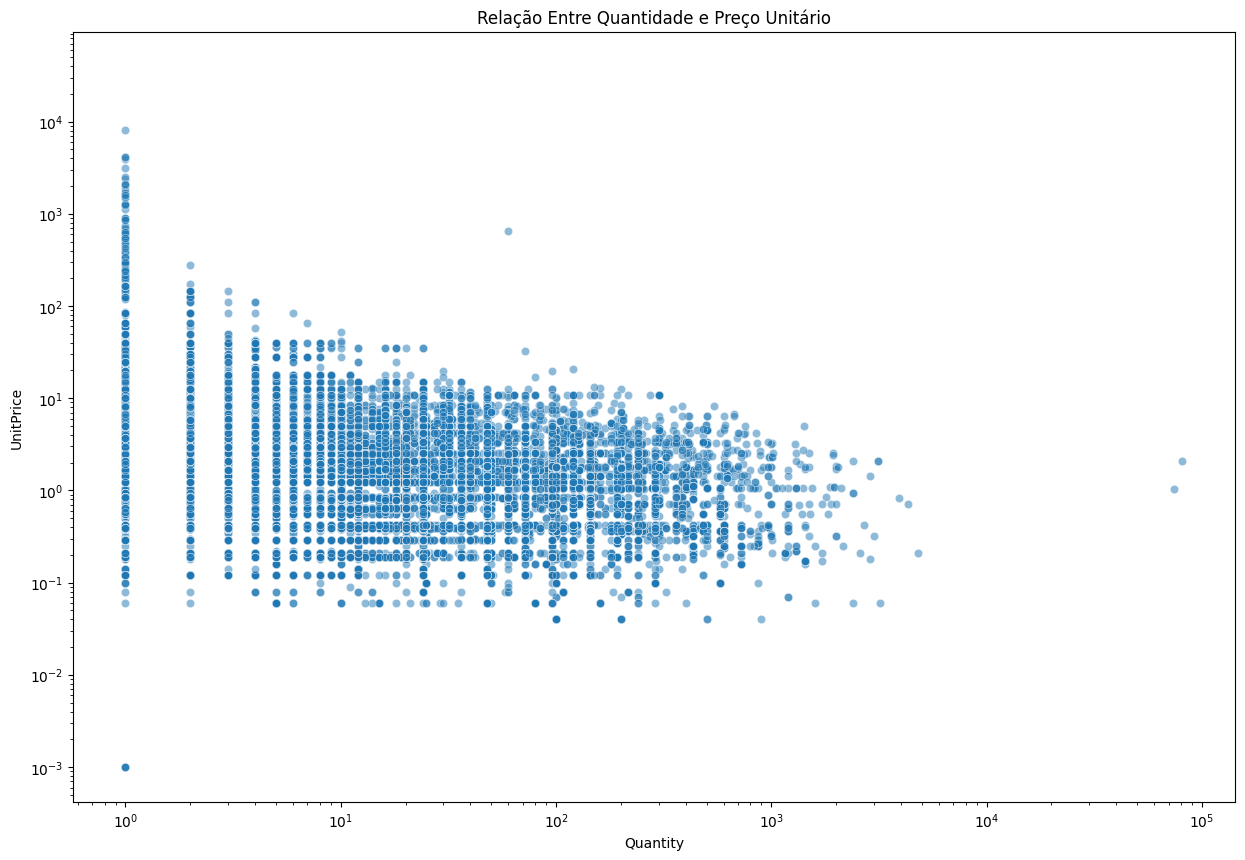

In [227]:
sns.scatterplot(data=df, x='Quantity', y='UnitPrice', alpha=0.5)
plt.title('Relação Entre Quantidade e Preço Unitário')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.xscale('log')
plt.yscale('log')
plt.show()

Com esse gráfico é possível identificar os países que contribuem significativamente para o volume total de pedidos, permitindo uma rápida compreensão dos principais mercados ou regiões de interesse.

<ipython-input-228-472b2559e32c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_paises.index, y=top_paises.values,


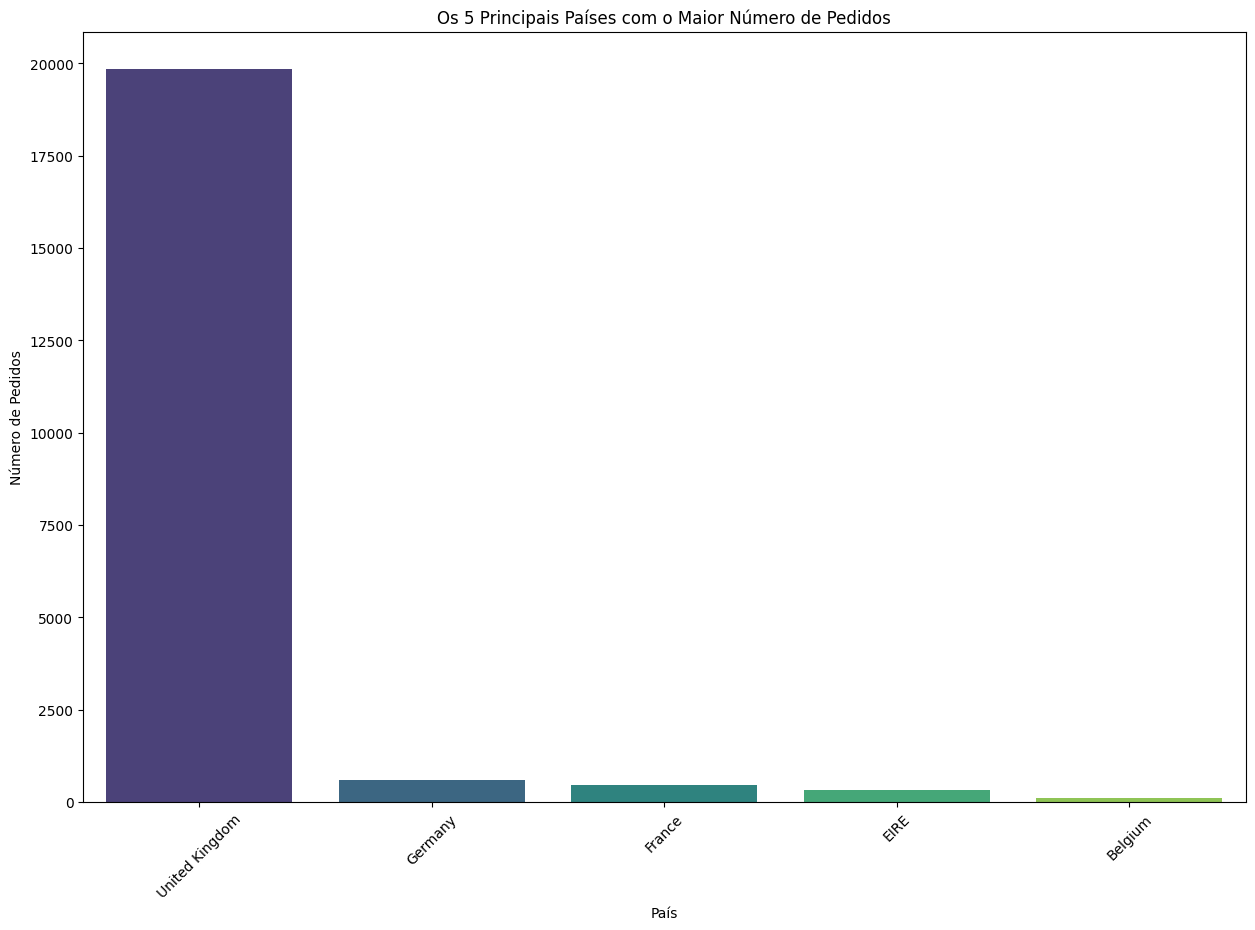

In [228]:
top_paises = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False).head(5)
sns.barplot(x=top_paises.index, y=top_paises.values,
palette='viridis')
plt.title('Os 5 Principais Países com o Maior Número de Pedidos')
plt.xlabel('País')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=45)
plt.show()

Com esse gráfico é possível identificar os clientes mais valiosos em termos de gasto, fornecendo insights sobre onde a empresa está gerando a maior parte de sua receita e quem são seus clientes mais importantes.

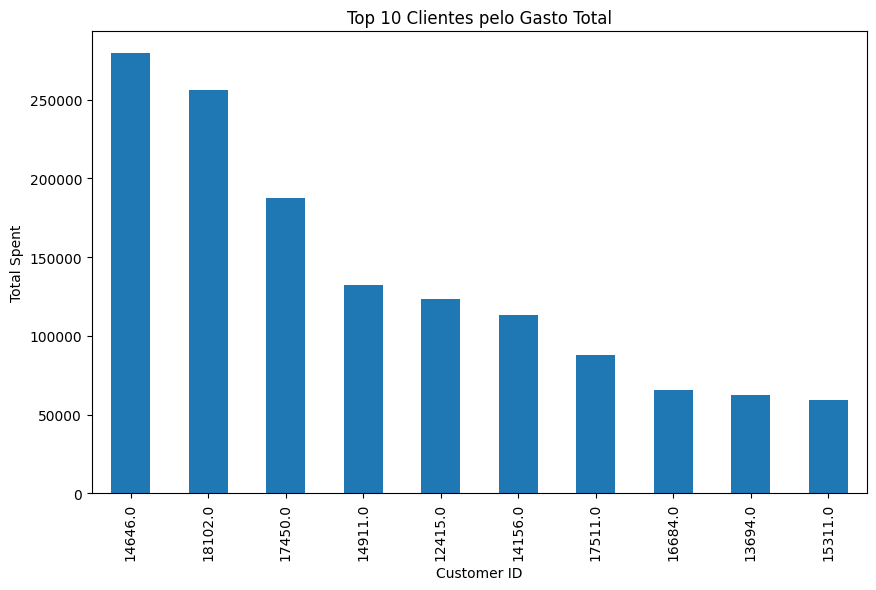

In [229]:
top_clientes = df.groupby('CustomerID')['TotalSpent'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_clientes.plot(kind='bar')
plt.title('Top 10 Clientes pelo Gasto Total')
plt.xlabel('Customer ID')
plt.ylabel('Total Spent')
plt.show()

Esse gráfico permite visualizar quais clientes têm um hábito de compra com produtos de preço médio mais alto. Ele destaca os clientes que, em média, compram produtos mais caros em comparação com outros clientes.

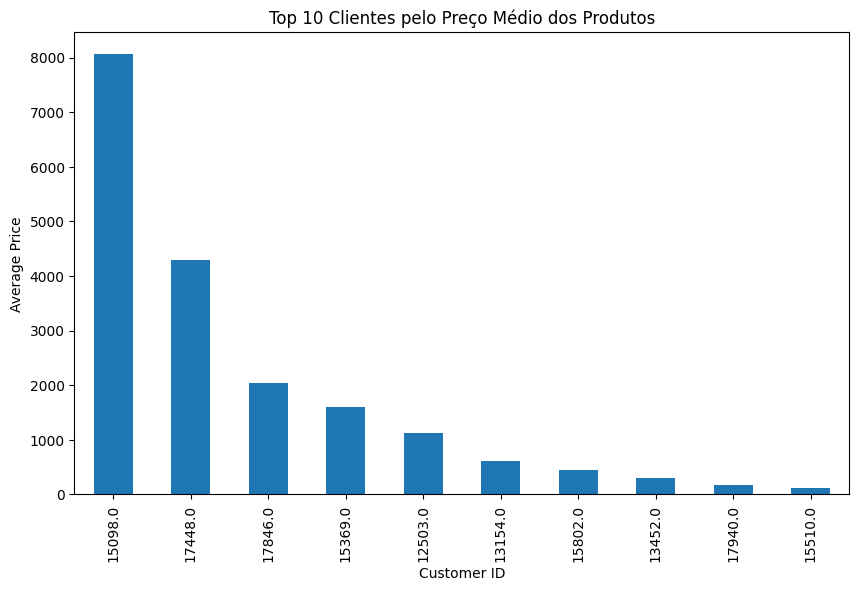

In [230]:
preco_medio_por_cliente = df.groupby('CustomerID')['AveragePrice'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
preco_medio_por_cliente.plot(kind='bar')
plt.title('Top 10 Clientes pelo Preço Médio dos Produtos')
plt.xlabel('Customer ID')
plt.ylabel('Average Price')
plt.show()

### Algoritmo Segmentação

In [231]:
from sklearn.cluster import KMeans

In [232]:
kmeans = KMeans(n_clusters=5, random_state=0)

In [233]:
kmeans.fit(df[['Quantity', 'UnitPrice', 'CustomerID', 'Month', 'TotalSpent', 'AveragePrice', 'Frequency']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=0)

In [234]:
centroids = kmeans.cluster_centers_

In [235]:
kmeans_labels = kmeans.predict(df[['Quantity', 'UnitPrice', 'CustomerID', 'Month', 'TotalSpent', 'AveragePrice', 'Frequency']])

In [236]:
pd.Series(kmeans_labels).value_counts()

,count
0,359949
3,21352
4,14558
1,8452
2,2518


In [237]:
centroids

array([[9.73614318e+00, 3.34132164e+00, 1.53224827e+04, 7.57513981e+00,
        3.25116618e+03, 3.34132164e+00, 2.76944781e+02],
       [3.31845717e+01, 5.13782063e+00, 1.46598406e+04, 7.57442026e+00,
        1.30814753e+05, 5.13782063e+00, 4.44750284e+03],
       [1.03590548e+02, 4.19378078e+00, 1.52403002e+04, 7.14138205e+00,
        2.75525208e+05, 4.19378078e+00, 1.80091898e+03],
       [1.94560697e+01, 2.89544352e+00, 1.54340860e+04, 7.86230798e+00,
        3.15757187e+04, 2.89544352e+00, 4.28205021e+03],
       [3.06106608e+01, 6.13451504e+00, 1.45854446e+04, 8.09032834e+00,
        5.89803909e+04, 6.13451504e+00, 2.80516568e+03]])

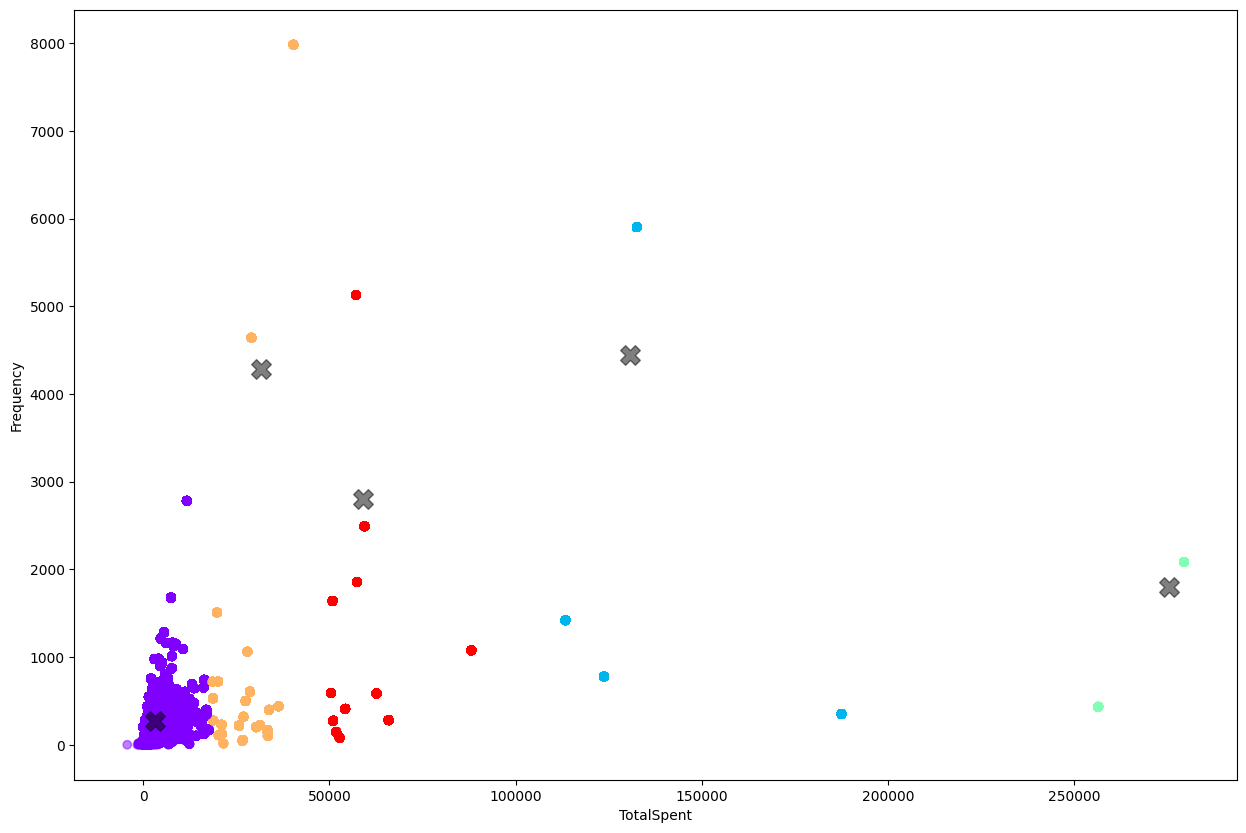

In [238]:
x_col = 'TotalSpent'
y_col = 'Frequency'

plt.scatter(df[x_col], df[y_col], c=kmeans_labels, alpha=0.5, cmap='rainbow')
plt.xlabel(x_col)
plt.ylabel(y_col)

centroids_x = centroids[:, 4]  # TotalSpent
centroids_y = centroids[:, 6]  # Frequency
plt.scatter(centroids_x, centroids_y, c='black', marker='X', s=200, alpha=0.5)

plt.rcParams['figure.figsize'] = (15, 10)
plt.show()


In [239]:
k = list(range(1, 10))
print(k)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


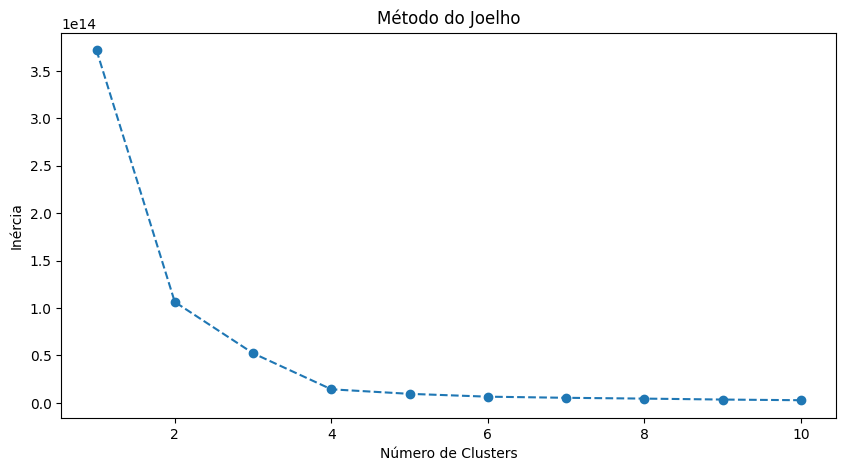

In [240]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []

# valores de k de 1 a 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df[['Quantity', 'UnitPrice', 'CustomerID', 'Month', 'TotalSpent', 'AveragePrice', 'Frequency']])
    wcss.append(kmeans.inertia_)

#  gráfico do cotovelo
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método do Joelho')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()


Ánalise de que o melhor numero de clusters é o 2 ou o 3, então vamos refazer

In [241]:
kmeans = KMeans(n_clusters=2, random_state=0)

In [242]:
kmeans.fit(df[['Quantity', 'UnitPrice', 'CustomerID', 'Month', 'TotalSpent', 'AveragePrice', 'Frequency']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=0)

In [243]:
centroids = kmeans.cluster_centers_

In [244]:
kmeans_labels = kmeans.predict(df[['Quantity', 'UnitPrice', 'CustomerID', 'Month', 'TotalSpent', 'AveragePrice', 'Frequency']])

In [245]:
pd.Series(kmeans_labels).value_counts()

,count
0,394783
1,12046


In [246]:
centroids

array([[1.08985417e+01, 3.42271092e+00, 1.52953749e+04, 7.60997814e+00,
        6.60685081e+03, 3.42271092e+00, 5.84615242e+02],
       [5.01684377e+01, 4.69798107e+00, 1.50358530e+04, 7.47385024e+00,
        1.57250679e+05, 4.69798107e+00, 3.59312502e+03]])

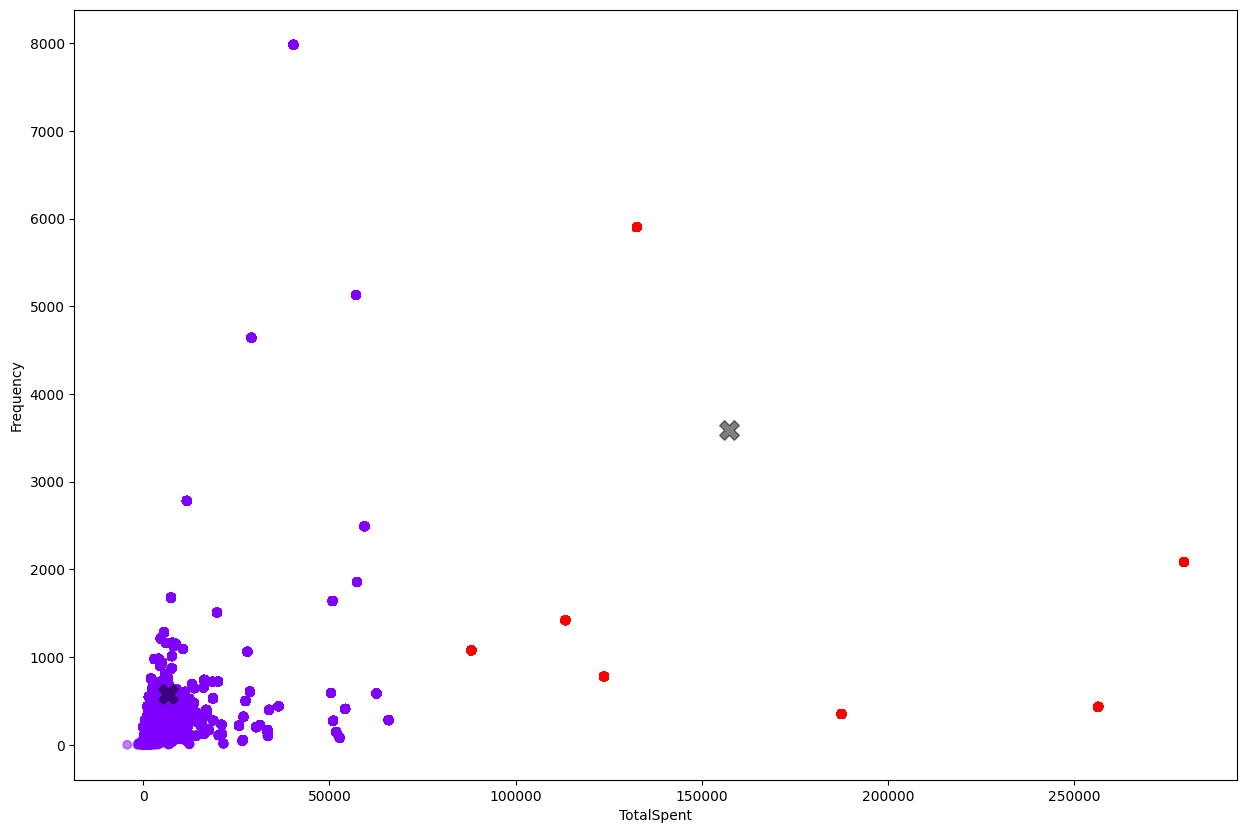

In [247]:
x_col = 'TotalSpent'
y_col = 'Frequency'

plt.scatter(df[x_col], df[y_col], c=kmeans_labels, alpha=0.5, cmap='rainbow')
plt.xlabel(x_col)
plt.ylabel(y_col)

centroids_x = centroids[:, 4]  # TotalSpent
centroids_y = centroids[:, 6]  # Frequency
plt.scatter(centroids_x, centroids_y, c='black', marker='X', s=200, alpha=0.5)

plt.rcParams['figure.figsize'] = (15, 10)
plt.show()

In [248]:
kmeans = KMeans(n_clusters=3, random_state=0)

In [249]:
kmeans.fit(df[['Quantity', 'UnitPrice', 'CustomerID', 'Month', 'TotalSpent', 'AveragePrice', 'Frequency']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

In [250]:
centroids = kmeans.cluster_centers_

In [251]:
kmeans_labels = kmeans.predict(df[['Quantity', 'UnitPrice', 'CustomerID', 'Month', 'TotalSpent', 'AveragePrice', 'Frequency']])

In [252]:
pd.Series(kmeans_labels).value_counts()

,count
0,381301
1,22659
2,2869


In [253]:
centroids

array([[1.02804372e+01, 3.31635347e+00, 1.53287322e+04, 7.59122058e+00,
        4.83727754e+03, 3.31635347e+00, 5.01221694e+02],
       [2.89984995e+01, 5.71124233e+00, 1.45688214e+04, 7.91800168e+00,
        8.37846589e+04, 5.71124233e+00, 3.45578777e+03],
       [1.14977344e+02, 4.83793308e+00, 1.55106399e+04, 7.09864064e+00,
        2.64753822e+05, 4.83793308e+00, 1.62353259e+03]])

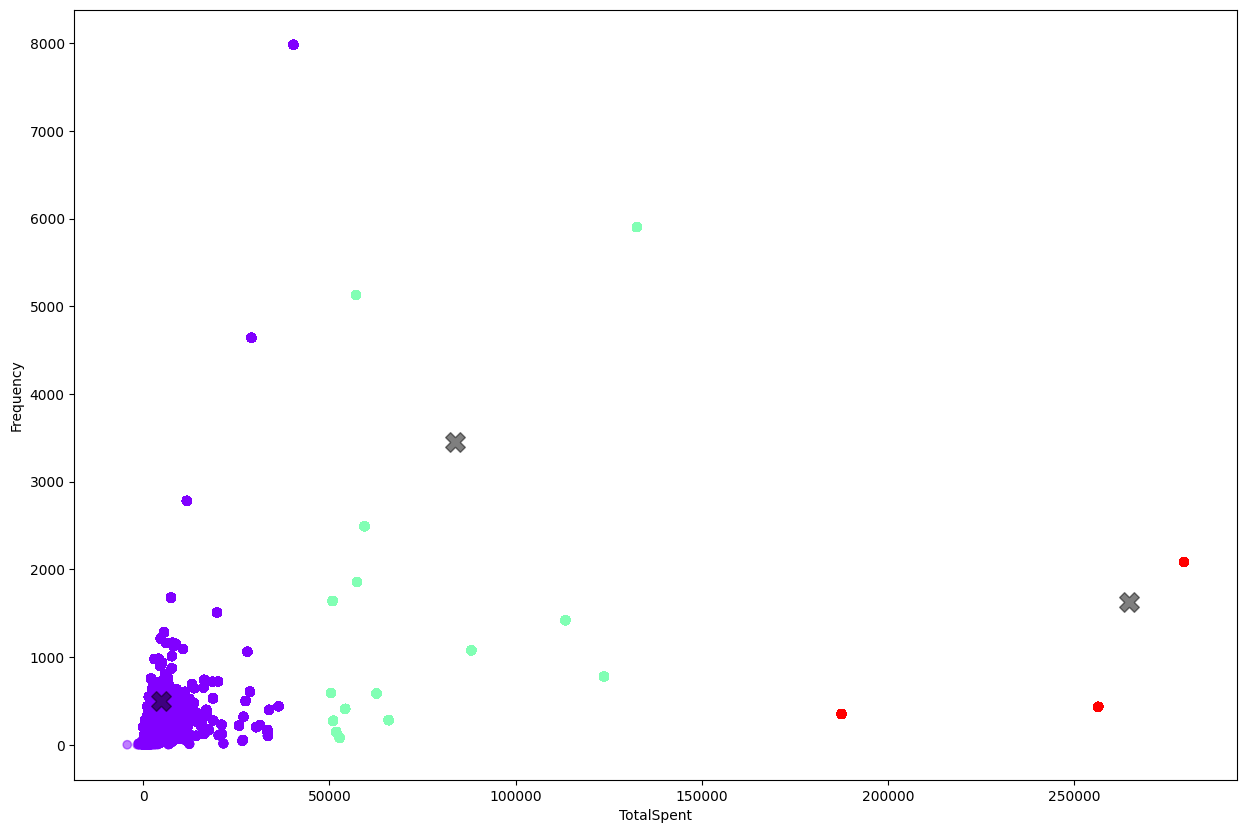

In [254]:
x_col = 'TotalSpent'
y_col = 'Frequency'

plt.scatter(df[x_col], df[y_col], c=kmeans_labels, alpha=0.5, cmap='rainbow')
plt.xlabel(x_col)
plt.ylabel(y_col)

centroids_x = centroids[:, 4]  # TotalSpent
centroids_y = centroids[:, 6]  # Frequency
plt.scatter(centroids_x, centroids_y, c='black', marker='X', s=200, alpha=0.5)

plt.rcParams['figure.figsize'] = (15, 10)
plt.show()

### Nomes descritivos para entendimento da clusterização



Com esse exemplo feito por último com 3 clusters, vamos fazer uma rotulação da segmentação que analisamos, para entendermos melhor o que a clusterização nos deu.

In [255]:
labels = kmeans.labels_

df['Cluster'] = labels

In [256]:
cluster_names = {
    0: 'Compradores Frequentes Econômicos',
    1: 'Compradores Moderados',
    2: 'Compradores Esporádicos de Luxo'

}

df['Segmento'] = df['Cluster'].map(cluster_names)

print(df.head())


   index InvoiceNo StockCode                          Description  Quantity  \
0      0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1      1    536365     71053                  WHITE METAL LANTERN         6   
2      2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3      3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4      4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

   UnitPrice  CustomerID         Country  Year  Month Year-Month  TotalPrice  \
0       2.55     17850.0  United Kingdom  2010     12    2010-12       15.30   
1       3.39     17850.0  United Kingdom  2010     12    2010-12       20.34   
2       2.75     17850.0  United Kingdom  2010     12    2010-12       22.00   
3       3.39     17850.0  United Kingdom  2010     12    2010-12       20.34   
4       3.39     17850.0  United Kingdom  2010     12    2010-12       20.34   

   TotalSpent  AveragePrice  Frequency  Clus

<ipython-input-257-8d44fa92c7ce>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Segmento', data=df, palette='viridis')


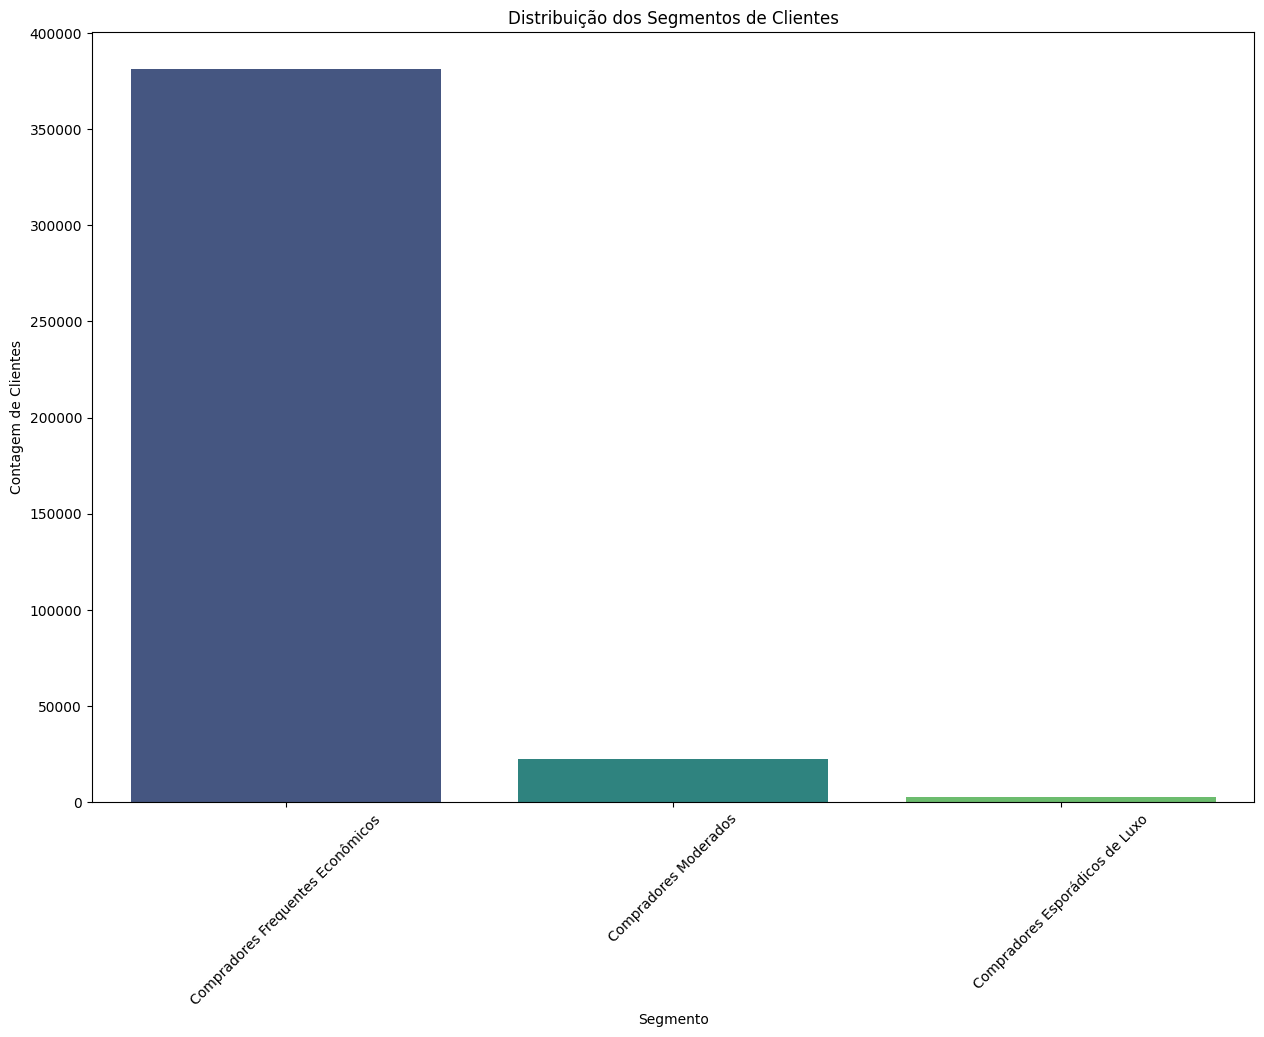

In [257]:
sns.countplot(x='Segmento', data=df, palette='viridis')
plt.title('Distribuição dos Segmentos de Clientes')
plt.xlabel('Segmento')
plt.ylabel('Contagem de Clientes')
plt.xticks(rotation=45)
plt.show()

Então com esse gráfico é possível analisar que temos 3 grupos diferentes de clientes do varejo online:
- a maioria são clientes que não gastam tanto, mas são os que compram com maior frequência;
- em média tem os clientes que são moderados, que não tem tanta frequência de compras mas também não gastam tão pouco, aqueles que estão na média comparado com a totalidade de clientes;
- e clientes que são mais esporádicos em suas compras, então não compram sempre, mas as vezes, e quando gastam, gastam bastante.

###Dashboard resumo das análises

Esses gráficos são úteis para entender tanto o comportamento de compra em termos de quantidade e preço, quanto a distribuição geográfica dos clientes ou pedidos.

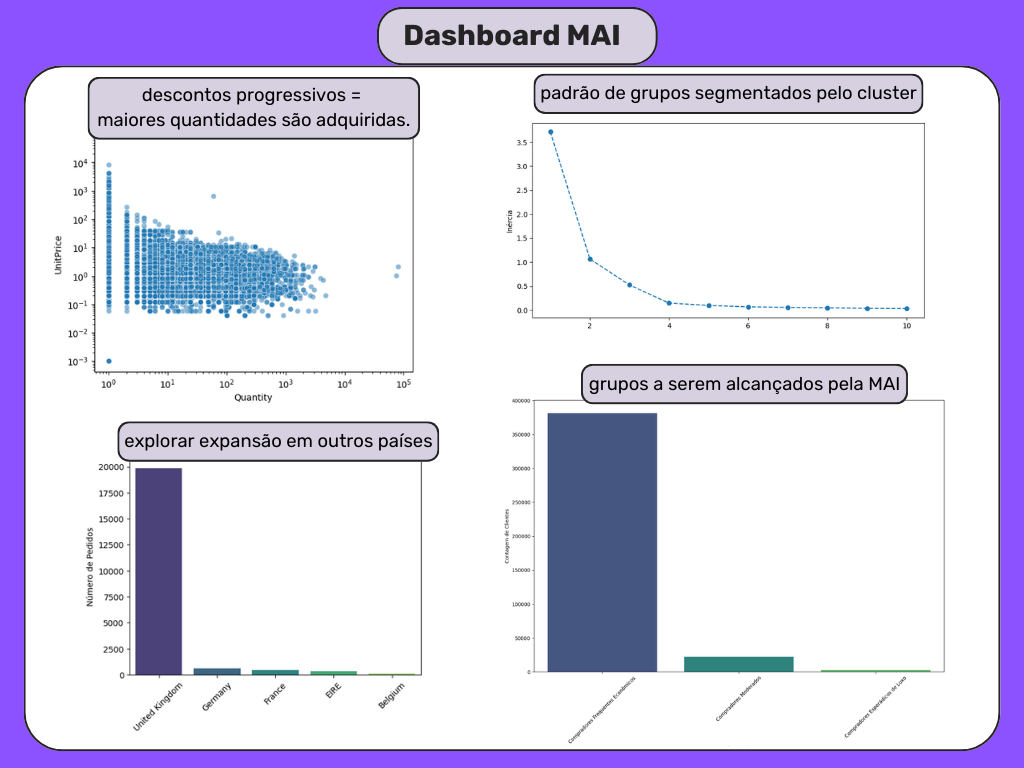

###De Clusterização a Classificação

In [260]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X= df[['Quantity', 'UnitPrice', 'CustomerID', 'Month', 'TotalSpent', 'AveragePrice', 'Frequency']]
Y= df['Segmento']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# avaliando
accuracy = clf.score(X_test, y_test)
print(f"Acurácia do modelo: {accuracy}")
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


Acurácia do modelo: 1.0
                                   precision    recall  f1-score   support

  Compradores Esporádicos de Luxo       1.00      1.00      1.00       561
Compradores Frequentes Econômicos       1.00      1.00      1.00     76139
            Compradores Moderados       1.00      1.00      1.00      4666

                         accuracy                           1.00     81366
                        macro avg       1.00      1.00      1.00     81366
                     weighted avg       1.00      1.00      1.00     81366



In [261]:
# Acurácia no treinamento
train_accuracy = clf.score(X_train, y_train)
print(f"Acurácia no treinamento: {train_accuracy}")

# Acurácia no teste
test_accuracy = clf.score(X_test, y_test)
print(f"Acurácia no teste: {test_accuracy}")


Acurácia no treinamento: 1.0
Acurácia no teste: 1.0


###Flask

In [262]:
import pickle

In [263]:
with open('meu_modelo_serializado.pickle', 'wb') as f:
    pickle.dump(clf, f)

In [264]:
with open('meu_modelo_serializado.pickle', 'rb') as f:
    modelo_carregado = pickle.load(f)

In [265]:
modelo_carregado.predict([[1,2.55,17850.0,12,5288.63,3.924712,196]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Compradores Frequentes Econômicos'], dtype=object)

###Script para JSON - Exemplo

In [ ]:
http://127.0.0.1:5000/prever?quantity=1&unitPrice=2.55&costumerId=17850.0&month=12&totalSpent=5288.63&avaregePrice=3.924712&frequency=196